In [1]:
#Import neccessary libaries 
import pandas as pd

In [2]:
#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset which has dates, devices and it metrics and whether is failure or Not failure
dataset = pd.read_csv(r"predictive_maintenance_dataset.csv")
dataset

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
#checking if any null values present in the dataset 
dataset.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
# convert date to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])
dataset

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [7]:
# date seperated as year, month, day,hence remove date col from the original dataset
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day
df = dataset.drop(['date'], axis=1)
df = df[['year', 'month', 'day', 'device','metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 
         'metric8', 'metric9','failure']]
df

,year,month,day,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
0,2015,1,1,S1F01085,215630672,55,0,52,6,407438,0,0,7,0
1,2015,1,1,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,2015,1,1,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,2015,1,1,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,2015,1,1,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015,11,2,Z1F0MA1S,18310224,0,0,0,10,353705,8,8,0,0
124490,2015,11,2,Z1F0Q8RT,172556680,96,107,4,11,332792,0,0,13,0
124491,2015,11,2,Z1F0QK05,19029120,4832,0,0,11,350410,0,0,0,0
124492,2015,11,2,Z1F0QL3N,226953408,0,0,0,12,358980,0,0,0,0


In [8]:
# Apparently the data is highly imbalanced 
df["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [9]:
# Create a dictionary mapping each device to a unique numeric value because cat value can't be processed ML algo
device_mapping = {device: i for i, device in enumerate(df['device'].unique())}
df['device'] = df['device'].map(device_mapping)
df

,year,month,day,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
0,2015,1,1,0,215630672,55,0,52,6,407438,0,0,7,0
1,2015,1,1,1,61370680,0,3,0,6,403174,0,0,0,0
2,2015,1,1,2,173295968,0,0,0,12,237394,0,0,0,0
3,2015,1,1,3,79694024,0,0,0,6,410186,0,0,0,0
4,2015,1,1,4,135970480,0,0,0,15,313173,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015,11,2,1039,18310224,0,0,0,10,353705,8,8,0,0
124490,2015,11,2,1062,172556680,96,107,4,11,332792,0,0,13,0
124491,2015,11,2,1069,19029120,4832,0,0,11,350410,0,0,0,0
124492,2015,11,2,1075,226953408,0,0,0,12,358980,0,0,0,0


In [10]:
df.columns

Index(['year', 'month', 'day', 'device', 'metric1', 'metric2', 'metric3',
       'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9',
       'failure'],
      dtype='object')

In [11]:
# Since the data is so imbalanced, hence applying combined Over sampling and undersampling technique
from imblearn.combine import SMOTETomek

Indep_var = df.drop(['failure'], axis=1)
dep_var = df['failure']

smt = SMOTETomek(random_state=0)
X_resampled_combined, y_resampled_combined = smt.fit_resample(Indep_var, dep_var)

# Display the new class distribution
y_resampled_combined.value_counts()

failure
0    118167
1    118167
Name: count, dtype: int64

In [12]:
# Split the training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled_combined, y_resampled_combined, test_size=0.3,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_logreg = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],
    'C': [10, 100, 1000, 2000, 3000]
}

param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

param_grid_RF = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 100]
}

# Create GridSearchCV for Logistic Regression
grid_logreg = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid_logreg,
                           refit=True,
                           verbose=3,
                           n_jobs=-1,
                           scoring='f1_weighted')

# Create GridSearchCV for Decision Tree
grid_DT = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid=param_grid_DT,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Create GridSearchCV for Random Forest
grid_RF = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_grid_RF,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Fit the models for grid search
grid_logreg.fit(X_train, Y_train)
grid_DT.fit(X_train, Y_train)
grid_RF.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1_weighted', verbose=3)

In [14]:
#checking the confusion matric & classification report
grid_predictions = grid_logreg.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrics for Log reg\n", cm,'\n')
print("Classification report for Log reg\n", cl_rep)

Confusion Matrics for Log reg
 [[34225  1127]
 [11465 24084]] 

Classification report for Log reg
               precision    recall  f1-score   support

           0       0.75      0.97      0.84     35352
           1       0.96      0.68      0.79     35549

    accuracy                           0.82     70901
   macro avg       0.85      0.82      0.82     70901
weighted avg       0.85      0.82      0.82     70901



In [15]:
grid_predictions = grid_RF.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrisc for Random Forest\n", cm,'\n')
print("Classification report for Random Forest\n", cl_rep)

Confusion Matrisc for Random Forest
 [[35336    16]
 [   19 35530]] 

Classification report for Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35352
           1       1.00      1.00      1.00     35549

    accuracy                           1.00     70901
   macro avg       1.00      1.00      1.00     70901
weighted avg       1.00      1.00      1.00     70901



In [16]:
grid_predictions = grid_DT.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matric for Decision Tree\n", cm,'\n')
print("Classification report for Decision Tree\n", cl_rep)

Confusion Matric for Decision Tree
 [[35272    80]
 [   44 35505]] 

Classification report for Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35352
           1       1.00      1.00      1.00     35549

    accuracy                           1.00     70901
   macro avg       1.00      1.00      1.00     70901
weighted avg       1.00      1.00      1.00     70901



ROC-AUC Score: 0.9240055595535559


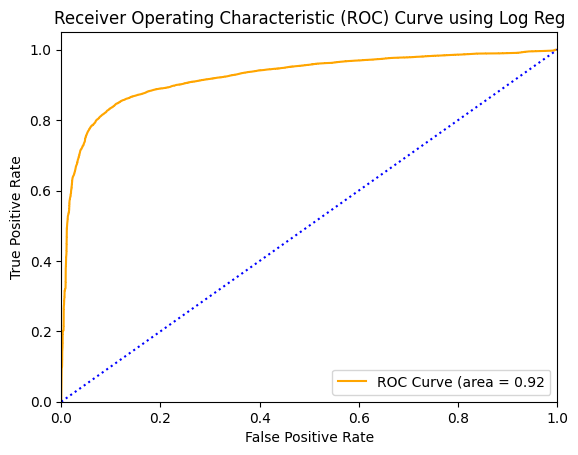

In [17]:
#check eval matrics using ROC-AUC
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_logreg.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_logreg.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Log Reg')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.9982496581870418


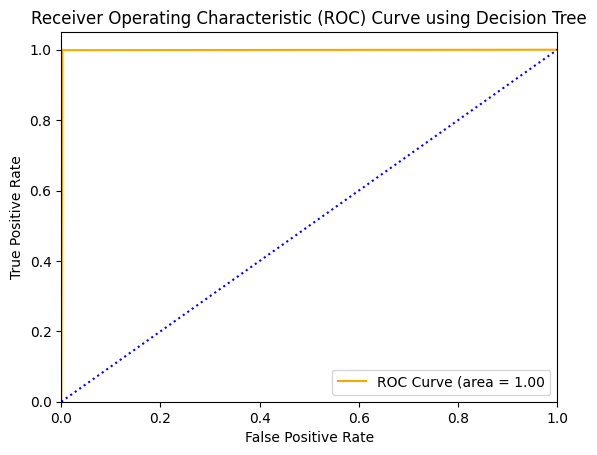

In [18]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_DT.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_DT.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Decision Tree')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.9999984041896064


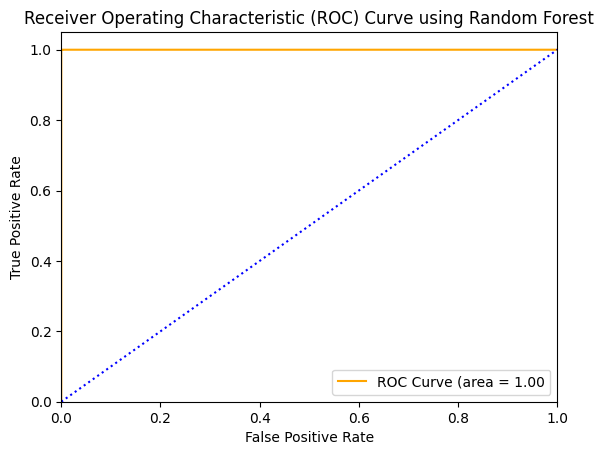

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_RF.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_RF.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Random Forest')
plt.legend(loc="lower right")
plt.show()

In [20]:
# viewing the result performance in a table using GridsearchCV
re = grid_logreg.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,37.155744,0.438326,0.074833,0.003681,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.817066,0.810146,0.815508,0.814393,0.813779,0.814178,0.002305,4
1,2.155623,0.532562,0.072849,0.004783,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.695852,0.689269,0.690921,0.686769,0.526083,0.657779,0.065915,11
2,5.607622,0.366705,0.077715,0.006570,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.691844,0.689319,0.692847,0.684867,0.695391,0.690854,0.003571,6
3,24.084313,0.790011,0.074965,0.003880,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.518008,0.514103,0.513204,0.514218,0.525657,0.517038,0.004615,19
4,37.711961,0.428271,0.076719,0.005947,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.814197,0.817010,0.815527,0.818189,0.814743,0.815933,0.001473,2
5,2.101555,0.520790,0.081634,0.008780,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.695852,0.689269,0.690921,0.686769,0.526083,0.657779,0.065915,11
6,5.264990,0.459001,0.076108,0.004328,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.691844,0.689319,0.692847,0.684867,0.695391,0.690854,0.003571,6
7,21.168433,0.225445,0.069579,0.008398,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.518008,0.514397,0.513172,0.514215,0.525689,0.517096,0.004597,17
8,33.841458,0.870298,0.071318,0.009079,1000,l2,newton-cg,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton...",0.815023,0.814862,0.815570,0.818505,0.814499,0.815692,0.001448,3
9,2.048668,0.461013,0.076566,0.004627,1000,l2,lbfgs,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}",0.695852,0.689269,0.690921,0.686769,0.526083,0.657779,0.065915,11


In [21]:
re = grid_RF.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131863,0.007869,0.000000,0.000000,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.109698,0.028032,0.000000,0.000000,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,10.011722,0.353750,0.198399,0.008338,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999214,0.999335,0.999335,0.999214,0.999305,0.999281,0.000055,8
3,102.305237,1.574256,1.339122,0.025297,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.999396,0.999547,0.999547,0.999456,0.999396,0.999468,0.000068,1
4,10.630293,0.370728,0.195621,0.004207,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999547,0.999486,0.999486,0.999396,0.999154,0.999414,0.000139,5
5,102.377288,1.046147,1.320570,0.016036,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.999486,0.999516,0.999547,0.999365,0.999426,0.999468,0.000065,2
6,0.082715,0.004071,0.000000,0.000000,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.085403,0.008900,0.000000,0.000000,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,10.396036,0.224968,0.187765,0.004428,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999396,0.999516,0.999305,0.999305,0.999396,0.999383,0.000078,6
9,100.203401,1.482408,1.243604,0.047281,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.999365,0.999456,0.999486,0.999365,0.999396,0.999414,0.000049,4


In [22]:
re = grid_DT.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126609,0.002312,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.106353,0.021338,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,1.513327,0.277814,0.080043,0.005800,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.997612,0.998096,0.998459,0.998217,0.998035,0.998084,0.000277,2
3,0.455207,0.031371,0.086513,0.008706,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.995678,0.996645,0.996041,0.996826,0.996252,0.996289,0.000413,8
4,1.543464,0.130126,0.079924,0.011297,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.997945,0.997703,0.998459,0.997068,0.997854,0.997806,0.000448,4
5,0.444943,0.030363,0.085308,0.006488,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.995950,0.996434,0.997280,0.996464,0.997159,0.996657,0.000495,6
6,0.078930,0.002692,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.094376,0.010497,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,1.408861,0.154787,0.072038,0.001991,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.997794,0.998005,0.997975,0.998126,0.998096,0.997999,0.000117,3
9,0.440741,0.024257,0.086662,0.009195,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.996887,0.995074,0.997280,0.996464,0.995889,0.996319,0.000775,7


In [23]:
# Function to preprocess date input from the user
def preprocess_date(date_str):
    # Convert the date string to a datetime object
    date = pd.to_datetime(date_str)
    
    # Extract the relevant features
    year = date.year
    month = date.month
    day = date.day
    
    # Create a DataFrame with these features
    date_features = pd.DataFrame({
        'year': [year],
        'month': [month],
        'day': [day],
    })
    
    return date_features

# Example user input date string
user_input_date = '1/23/2015'


# Preprocess the user input date
preprocessed_date = preprocess_date(user_input_date)

# Add the other necessary features (assuming average or typical values for the example)
preprocessed_date['device'] = 0
preprocessed_date['metric1'] = 192865952 
preprocessed_date['metric2'] = 0       
preprocessed_date['metric3'] = 0       
preprocessed_date['metric4'] = 9      
preprocessed_date['metric5'] = 36       
preprocessed_date['metric6'] = 271129   
preprocessed_date['metric7'] = 0        
preprocessed_date['metric8'] = 0        
preprocessed_date['metric9'] = 0       

# Assuming Indep_var is defined correctly elsewhere
Indep_var = ['year', 'month', 'day', 'device','metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

# Ensure the feature order matches the training data
preprocessed_date = preprocessed_date[Indep_var]

# Assuming grid_DT is defined and trained elsewhere
# Make a prediction using the preprocessed date features
prediction = grid_DT.predict(preprocessed_date)

#print(f'Prediction for the inputs : {prediction}')

if prediction == 0:
    print("FOR THE GIVEN INPUTS PREDICTED : Failure")
else:
    print("FOR THE GIVEN INPUTS PREDICTED : Non-Failure")

FOR THE GIVEN INPUTS PREDICTED : Non-Failure


In [24]:
#saved the best model 
import pickle 
pickle.dump(grid_DT,open("Predictive_Maint_best_model.sav",'wb'))

In [25]:
# Predicting Failure or Non-failure with new real time data inputs
import pickle
import numpy as np

# Example preprocess_date function to extract year, month, and day
def preprocess_date(date_string):
    date = pd.to_datetime(date_string, format='%d/%m/%Y')
    return date.year, date.month, date.day

# Load the model from file
with open("Predictive_Maint_best_model.sav", 'rb') as file:
    loaded_model = pickle.load(file)

# Preprocess the input data
year, month, day = preprocess_date('02/05/2015')
device = 1
metric1 = 192865952
metric2 = 0
metric3 = 0
metric4 = 9
metric5 = 36
metric6 = 271129
metric7 = 0
metric8 = 0
metric9 = 0

# Prepare the data in the correct format
new_data = np.array([[year, month, day, device, metric1, metric2, metric3, metric4, metric5, metric6, metric7, metric8, metric9]])

# Make predictions
final = loaded_model.predict(new_data)

if final == 0:
    print("FOR THE GIVEN INPUTS PREDICTED : Failure")
else:
    print("FOR THE GIVEN INPUTS PREDICTED : Non-Failure")

FOR THE GIVEN INPUTS PREDICTED : Failure
